In [1]:
import sys
sys.path.append('../')
from fcc_utils import *
from scanpy_utils import *

In [44]:
# reload functions when editing file
del sys.modules['scanpy_utils']
from scanpy_utils import *

In [ ]:
retina = sc.read('../inputs/GSM1626793_P14Retina_1.processed.h5ad')

In [24]:
retina

AnnData object with n_obs × n_vars = 1326 × 500 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'cluster'
    var: 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'dca', 'fitsne', 'glmpca', 'pca10', 'pca2', 'scvi', 'scvis', 'simlr', 'tsne', 'umap', 'zifa', 'zinbwave'
    layers: 'arcsinh_norm', 'raw_counts'

In [25]:
usage = pd.read_csv('cNMF/retina_cNMF/retina_cNMF.usages.k_7.dt_2_00.consensus.txt', sep='\t', index_col=0)
usage.columns = ['Usage_%s' % i for i in usage.columns]
usage.head()

,Usage_1,Usage_2,Usage_3,Usage_4,Usage_5,Usage_6,Usage_7
index,,,,,,,
GGCCGCAGTCCG,175.042195,0.000000,3.901153,0.000000,44.448127,3418.705507,33.834048
CTTGTGCGGGAA,528.352337,30.079405,0.000000,0.000000,0.000000,2758.154997,0.000000
GCGCAACTGCTC,0.000000,0.000000,14.604826,0.000000,54.705605,2744.799032,37.608436
GATTGGGAGGCA,255.774381,51.101259,1.598053,50.563390,41.913185,1576.861606,0.000000
CCTCCTAGTTGG,46.591131,18.567270,2.425312,96.221349,19.940792,1772.280978,0.000000


In [26]:
usage_norm = usage.div(usage.sum(axis=1), axis=0)
usage_norm.head()

,Usage_1,Usage_2,Usage_3,Usage_4,Usage_5,Usage_6,Usage_7
index,,,,,,,
GGCCGCAGTCCG,0.047618,0.000000,0.001061,0.000000,0.012092,0.930024,0.009204
CTTGTGCGGGAA,0.159306,0.009069,0.000000,0.000000,0.000000,0.831625,0.000000
GCGCAACTGCTC,0.000000,0.000000,0.005121,0.000000,0.019183,0.962507,0.013188
GATTGGGAGGCA,0.129322,0.025837,0.000808,0.025565,0.021192,0.797276,0.000000
CCTCCTAGTTGG,0.023819,0.009492,0.001240,0.049192,0.010195,0.906062,0.000000


In [27]:
retina.obs = pd.merge(left=retina.obs, right=usage_norm, how='left', left_index=True, right_index=True)

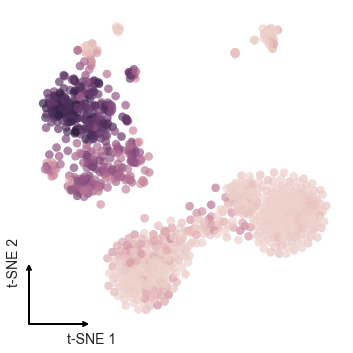

In [28]:
DR_plot(dim_name='t-SNE').plot(retina.obsm['tsne'], color=retina.obs['Usage_1'])

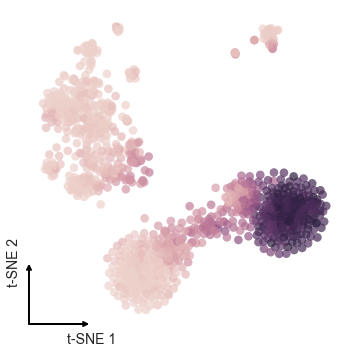

In [29]:
DR_plot(dim_name='t-SNE').plot(retina.obsm['tsne'], color=retina.obs['Usage_2'])

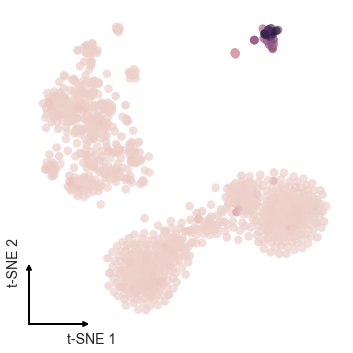

In [30]:
DR_plot(dim_name='t-SNE').plot(retina.obsm['tsne'], color=retina.obs['Usage_3'])

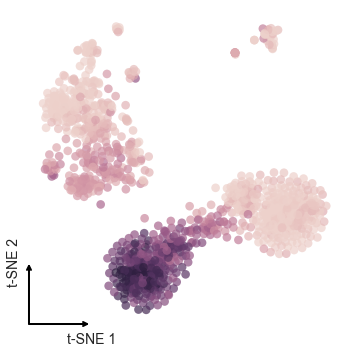

In [31]:
DR_plot(dim_name='t-SNE').plot(retina.obsm['tsne'], color=retina.obs['Usage_4'])

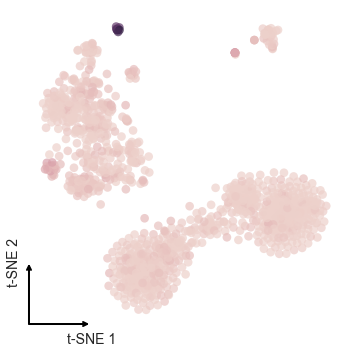

In [32]:
DR_plot(dim_name='t-SNE').plot(retina.obsm['tsne'], color=retina.obs['Usage_5'])

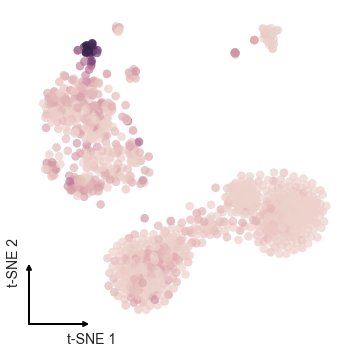

In [33]:
DR_plot(dim_name='t-SNE').plot(retina.obsm['tsne'], color=retina.obs['Usage_6'])

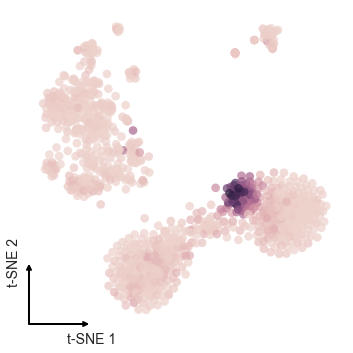

In [34]:
DR_plot(dim_name='t-SNE').plot(retina.obsm['tsne'], color=retina.obs['Usage_7'])

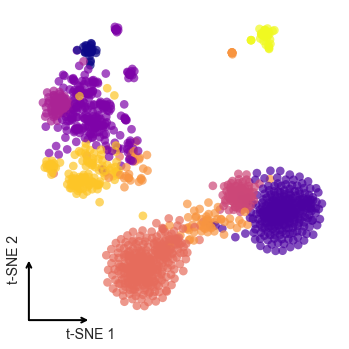

In [45]:
DR_plot(dim_name='t-SNE').plot_IDs(adata=retina, obs_col='cluster', use_rep='tsne')

In [37]:
clu_names = retina.obs['cluster'].unique().astype(str)

In [38]:
mymap = plt.get_cmap("plasma")
colors = mymap(np.linspace(0, 1, len(clu_names)))

In [39]:
colors

array([[0.050383, 0.029803, 0.527975, 1.      ],
       [0.299855, 0.009561, 0.631624, 1.      ],
       [0.494877, 0.01199 , 0.657865, 1.      ],
       [0.665129, 0.138566, 0.585582, 1.      ],
       [0.798216, 0.280197, 0.469538, 1.      ],
       [0.901807, 0.425087, 0.359688, 1.      ],
       [0.973416, 0.585761, 0.25154 , 1.      ],
       [0.993033, 0.77172 , 0.154808, 1.      ],
       [0.940015, 0.975158, 0.131326, 1.      ]])

In [40]:
cdict = dict(zip(clu_names, colors))

In [41]:
cdict

{'8.0': array([0.050383, 0.029803, 0.527975, 1.      ]),
 '1.0': array([0.299855, 0.009561, 0.631624, 1.      ]),
 '2.0': array([0.494877, 0.01199 , 0.657865, 1.      ]),
 '6.0': array([0.665129, 0.138566, 0.585582, 1.      ]),
 '4.0': array([0.798216, 0.280197, 0.469538, 1.      ]),
 '0.0': array([0.901807, 0.425087, 0.359688, 1.      ]),
 '5.0': array([0.973416, 0.585761, 0.25154 , 1.      ]),
 '3.0': array([0.993033, 0.77172 , 0.154808, 1.      ]),
 '7.0': array([0.940015, 0.975158, 0.131326, 1.      ])}

In [43]:
retina.obs['cluster'].astype(str)

index
GGCCGCAGTCCG    8.0
CTTGTGCGGGAA    8.0
GCGCAACTGCTC    8.0
GATTGGGAGGCA    8.0
CCTCCTAGTTGG    8.0
               ... 
TTGGCATGGAGT    0.0
ACAGGGGCTCCG    0.0
GTCGAGTCTGGG    1.0
CACTTGAGAGCC    1.0
ATAGCTAAATTA    1.0
Name: cluster, Length: 1326, dtype: object